Pepsi.co Data Challenge
Author: Suri Chen

Task: Your task is to explore data to inform new product innovation. PepsiCo wants to get ahead of the next food & beverage trend, and in order to do that, we need rich datasets about what people like, what they don't like, and what they're talking about. Social data allows us to observe what people broadcast each day, in everyday language that consumers use. This helps us to understand how conversations naturally develop and shift over time. It also provides a window into a huge, constantly updating stream of content in the consumer's own voice, which provides rich text analytics options for the future trend prediction model. To this end, we would like you to complete the following tasks:
- (1)Web scrape a website that you think may be informative about food and beverage trends in Python. (Social media content, blogs, e-commerce sites, etc.)
- (2)Conduct an interesting analysis on the data that you scrape.

## Introduction
- In this file, I leveraged two platforms: Google and Twitter.
- Google Trends provides some ideas of what's shaping the food and drinks habit.
- From Twitter, we could get closer to the public sounds and find out how people react to the specific topic, what they need? What are they interested in?
- Because of the time limitation, the scope and aspects I decided to analysis are limited. In addition, my works focus on data collection and descriptive analytics. In further work, I would need to conduct more hypothesis test and validation to confirm the relationship between these features and the attitude of products.
- However, this short work allows me to learn some fun fact in food and beverage industry, in people's shift of lifestyle. Hope you could enjoy!

In [225]:
!pip install pytrends

In [37]:
import numpy  as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

import proxypool as pp

In [3]:
def proxy():
    return 'https://'+pp.generate_proxy(pp.get_proxy_list())
proxy()

'https://45.7.231.76:8080'

In [90]:
#we want to know more about the related topic
kwl_food=['food','snacks','beverage','best snacks','drinks']

#
kwl_corp=['pepsi','coca cola','reed','pepsi co']

#the trend along the time will be interested
kwl_product=['lays','coca','ruffles','aquafina','tropicana'],['lipton','quaker','oats','doritos','nutrition']


kwl_ingradient=['Cannabidiol','CBD product','flavor','best flavor','new flavor']
kwl_dict={'kw_food':kwl_food,'kw_corp':kwl_corp,'kw_product':kwl_product,'kw_ing':kwl_ingradient}

tf='today 12-m'
geo='US'
cat=71


In [5]:
from pytrends.request import TrendReq

### Keywords: food
- connect to **Google Trend API**, scrap the last 1-year trend related to food & beverage
- Select 10 keywords that related to food
- keywords include: 
    - 'food'
    - 'snacks'  
    - 'beverage'   
    - 'best snacks'   
    - 'best beverage'   
- time line: 1 year
- region: USA
- features: **interest over time**/  **related queries**/ **related topics**
- main intention: we would like to see when people search for food/snacks or beverage, what they want to know.

In [91]:
pytrend = TrendReq(proxies={'https':proxy()})
food_iot_df=pd.DataFrame()
food_rq_dict={}
food_rt_dict={}
pytrend.build_payload(kw_list=kwl_dict['kw_food'],cat=cat,timeframe=tf,geo=geo)    
# Interest Over Time: iot
food_iot_df = pytrend.interest_over_time()
# Related Queries, returns a dictionary of dataframes: rq
food_rq_dict = pytrend.related_queries()
#Related Topics, returns a dictionary of dataframes: rt
food_rt_dict= pytrend.related_topics()

# Interest by Region: ibr
#food_IBR_df = pytrend.interest_by_region()



#### Analysis the related quries

{'top': None, 'rising': None}

<Figure size 3600x1440 with 0 Axes>

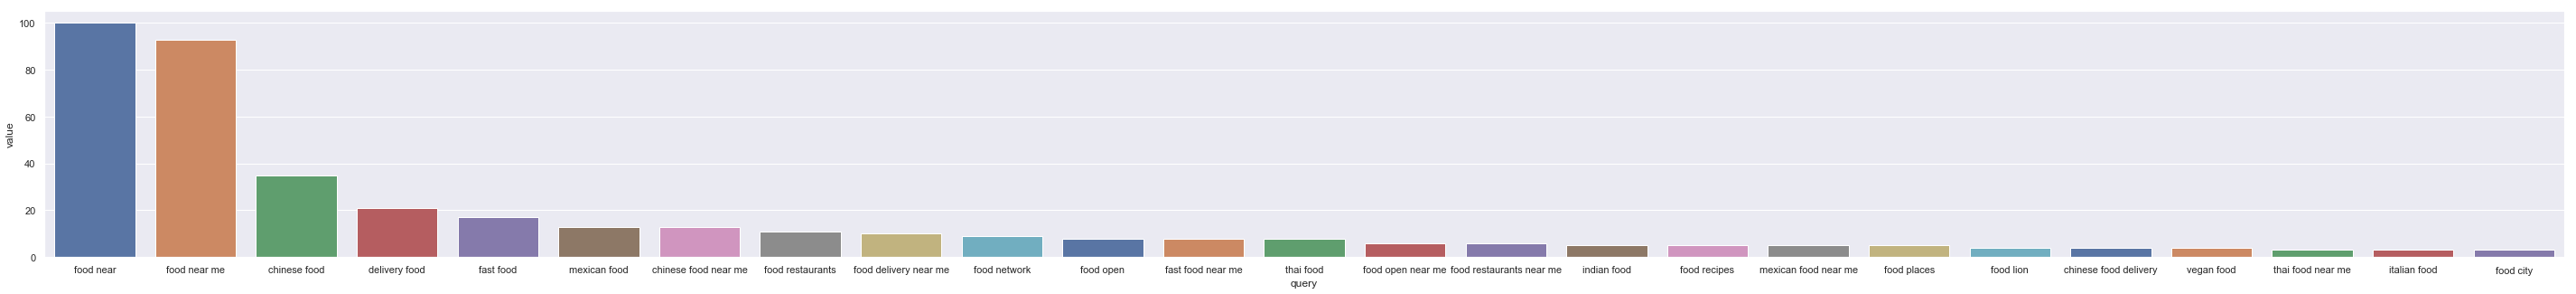

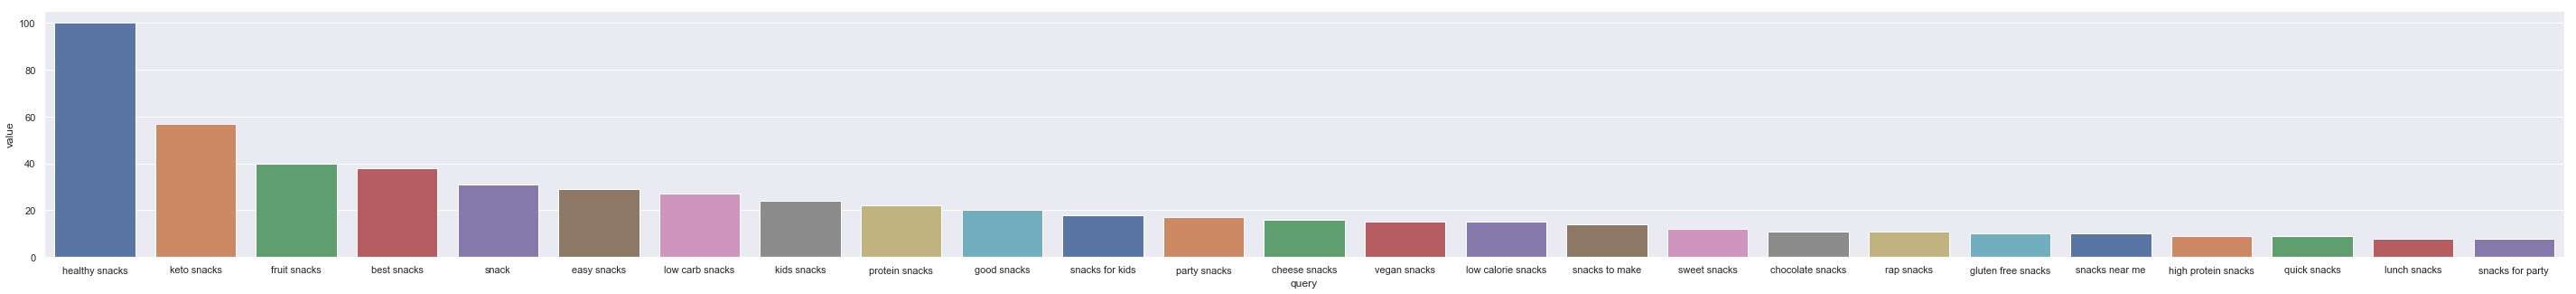

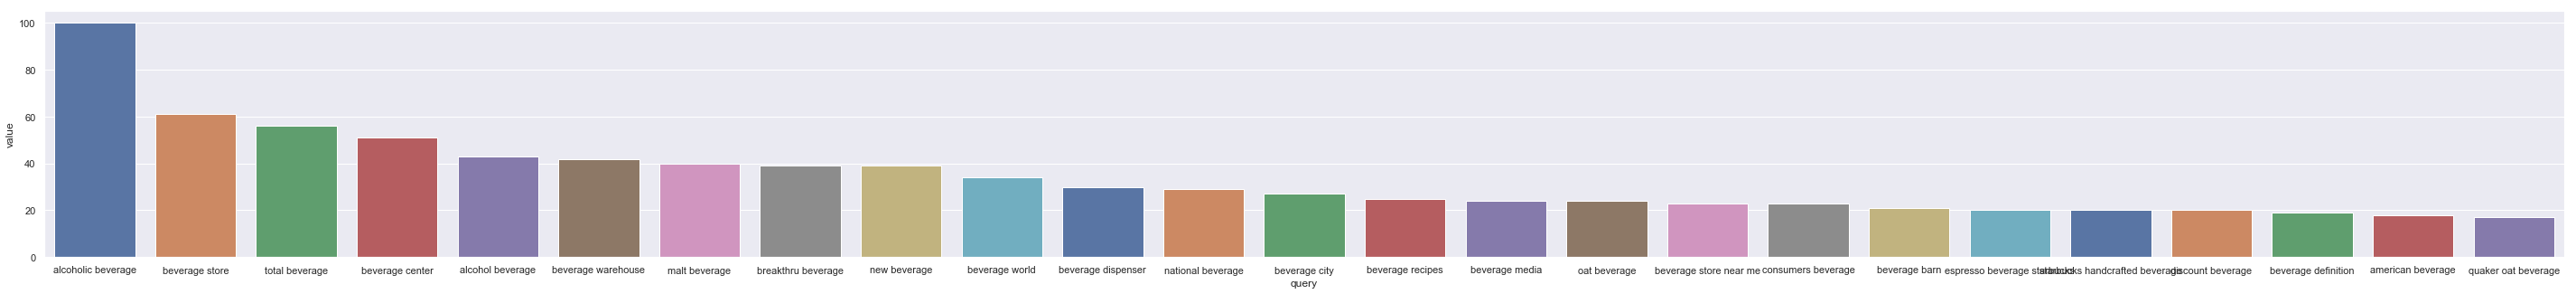

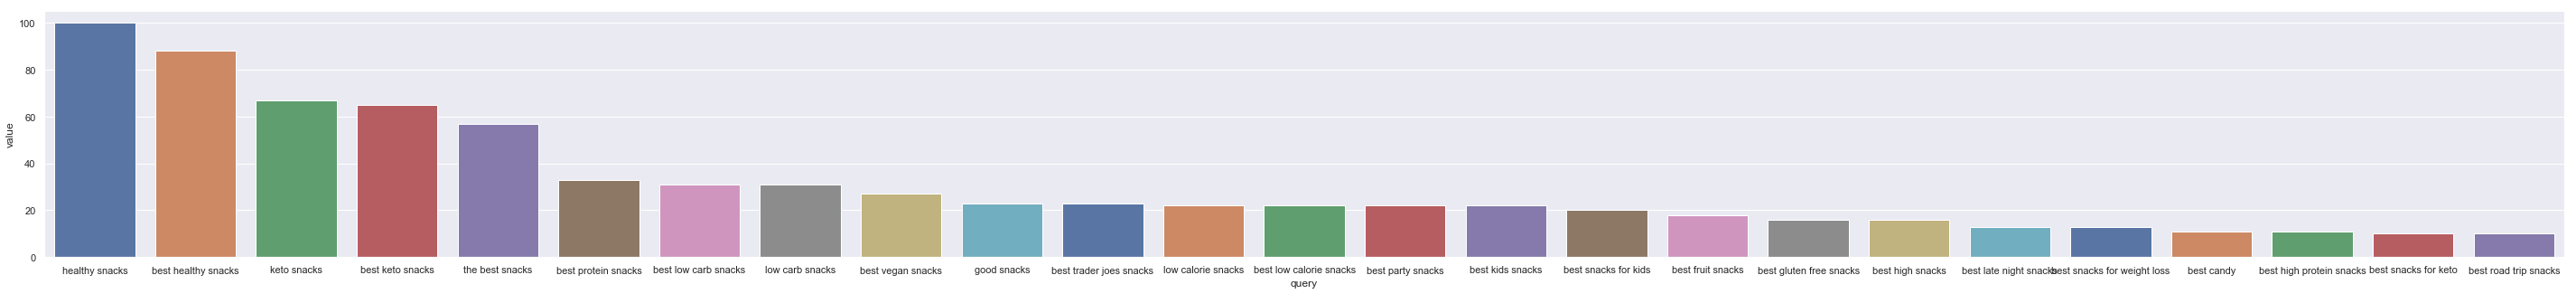

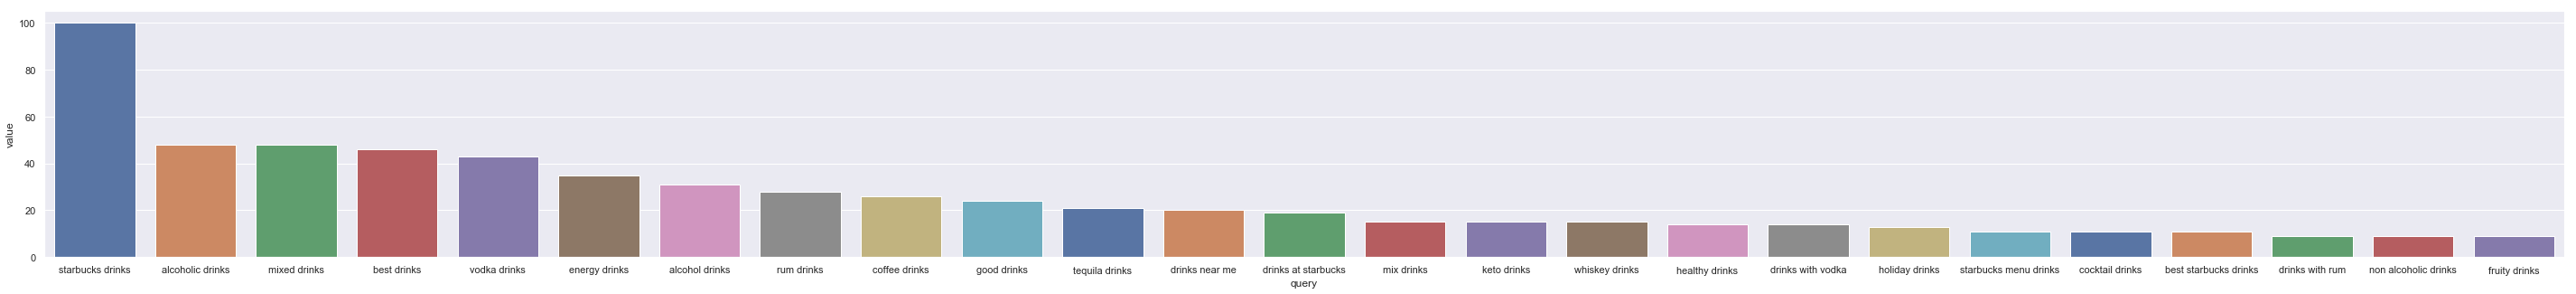

In [97]:
# Set up the matplotlib figure
#f, (ax1) = plt.subplots( figsize=(10, 8), sharex=True)

fig = plt.figure(figsize=(50,20))
fig.subplots_adjust(hspace=5, wspace=4)
for i in range(1,6):
    f,ax=plt.subplots(figsize=(50,5))
    sns.barplot(x=food_rq_dict[kwl_food[i-1]]['top']['query'], y=food_rq_dict[kwl_food[i-1]]['top']['value'], palette="deep")

#### The result is not really explicit, so that's dealing with these key words

In [149]:
food_rq_df=pd.DataFrame()

In [150]:
for key in kwl_food:
    food_rq_df=food_rq_df.append(food_rq_dict[key]['top'])

In [151]:
freq = pd.Series(' '.join(food_rq_df['query']).split()).value_counts()[:8]

In [152]:
freq
#we want to remove these words

snacks       48
food         25
beverage     25
drinks       25
best         23
near         12
me           11
starbucks     6
dtype: int64

In [154]:
freq = list(freq.index)
food_rq_df['query'] = food_rq_df['query'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [155]:
pd.Series(' '.join(food_rq_df['query']).split()).value_counts()[:15]

low          6
for          5
keto         5
kids         4
protein      4
healthy      4
calorie      3
high         3
vegan        3
alcoholic    3
delivery     3
chinese      3
party        3
carb         3
good         3
dtype: int64

In [157]:
#do the same thing to the rise topics
food_rq_df_rise=pd.DataFrame()
for key in kwl_food:
    food_rq_df_rise=food_rq_df_rise.append(food_rq_dict[key]['rising'])
freq_rising = pd.Series(' '.join(food_rq_df_rise['query']).split()).value_counts()[:10]
freq_rising
#it is really interesting to see that keto, healthy, free, oat

snacks       39
keto         35
beverage     24
drinks       23
best         16
food         14
starbucks    14
me            9
near          6
at            5
dtype: int64

In [158]:
food_rq_df_rise['query'] = food_rq_df_rise['query'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [159]:
pd.Series(' '.join(food_rq_df_rise['query']).split()).value_counts()[:15]

keto         35
at            5
friendly      4
fast          3
cold          3
on            3
bear          2
energy        2
buy           2
alcoholic     2
fruit         2
recipes       2
koios         2
for           2
new           2
dtype: int64

#### Are they still a trend?
- keto, health, calorie, protein, vegan, carb, fruit, koios. Those tag mark up a trend of healthier/fitness/beauty boost eating style
- However, we would like to get closer to see whether there still a trend 

In [174]:
pytrend = TrendReq(proxies={'https':proxy()})
iot_df=pd.DataFrame()
rq_dict={}
rt_dict={}
pytrend.build_payload(kw_list=['keto','health','calorie','protein','vegan'],cat=cat,timeframe=tf,geo=geo)    
# Interest Over Time: iot
iot_df = pytrend.interest_over_time()
# Related Queries, returns a dictionary of dataframes: rq
rq_dict = pytrend.related_queries()
#Related Topics, returns a dictionary of dataframes: rt
rt_dict= pytrend.related_topics()


In [183]:
iot_df.head()

,keto,health,calorie,protein,vegan,isPartial
date,,,,,,
2018-04-22,34,11,9,17,66,False
2018-04-29,37,11,9,15,61,False
2018-05-06,40,11,9,16,62,False
2018-05-13,42,10,8,15,63,False
2018-05-20,43,10,8,15,63,False


/anaconda3/envs/PepsiDataChallenge/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


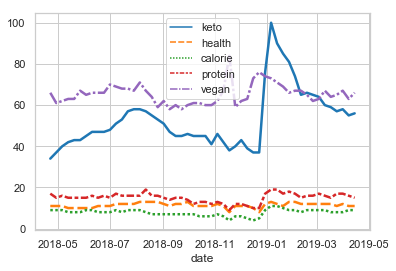

In [189]:
sns.set(style="whitegrid")
sns.lineplot(data=iot_df[['keto','health','calorie','protein','vegan']], palette="tab10", linewidth=2.5)

In [214]:
iot_df=pd.DataFrame()
kwl=['keto','vegan']
pytrend = TrendReq(proxies={'https':proxy()})
pytrend.build_payload(kw_list=['keto'],cat=cat,timeframe='today 5-y',geo=geo)    
iot_df_keto=pytrend.interest_over_time()
    # Interest Over Time: iot
pytrend = TrendReq(proxies={'https':proxy()})
pytrend.build_payload(kw_list=['vegan'],cat=cat,timeframe='today 5-y',geo=geo)    
iot_df_vegan=pytrend.interest_over_time()


In [266]:
iot_df=pd.DataFrame()
error=True
while error==True:
    try:
        pytrend = TrendReq(proxies={'https':proxy()})
        pytrend.build_payload(kw_list=kwl,cat=cat,timeframe='today 5-y',geo=geo) 
        error=False
        print(key+' finished')
    except:
        error=True
        print('request failed')
iot_df = pd.concat([iot_df,pytrend.interest_over_time()],axis=1)

vegan finished


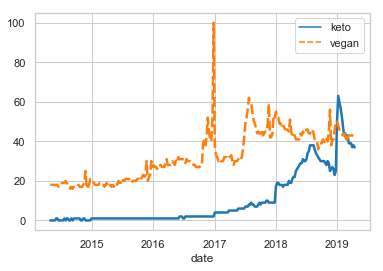

In [270]:
sns.set(style="whitegrid")
sns.lineplot(data=iot_df[['keto','vegan']], palette="tab10", linewidth=2.5)

## Summary:
- In this note book, I connected to the Google Trends and found out the trendy(the top and rising) interests and queries in terms of food & snacks & beverage, after the basic keywords processing, in the past 1 year, the keywords 'keto, health, calorie, protein, vegan, carb, fruit, koios' reveal people are focusing on more healthier, beauty-boosting, diet, fitness food. In addition, 'keto' and 'vegan', in relative searching volume, are higher than the others.
- Next, I would like to know if there is a trend over time and it will help me better predict the future trends. I picked out 'keto' and 'vegan' to analysis their time series independently. The condition is under 5 years time scope and within United States. I found out both 'vegan' and 'keto' search volume increased in the past 5 years, while keto has greater increasing rate and vegan overall has greater attention.
- all the trending data are conditioned on United States region and Food & Drinks catagory. However, in the future research, it's better to fetch the absolute data related to keywords search that could better enable us to capture the trend
- In the next file, 'twitters text mining', I showed my interest in 'keto'/'keto diet'. I wanted to know, when people talked about 'keto' what they talked about the most. It could help me to understand, in the perspective of building a new product/new flavor, what kind of products people in keto diet are tend to show their interests.

## Easter Egg
- When I was doing brainstorming, I read some article that talk about Cannabidiol Products. Out of curiousty, I also cloned down the data of CBD product.
- the topics and related queries is steadly increasing over years and it illustrates the change of ingradient that might influce the food industry in the following year

In [232]:
pytrend = TrendReq(proxies={'https':proxy()})
ing_rq_dict={}
pytrend.build_payload(kw_list=kwl_ingradient,cat=cat,timeframe=tf,geo=geo)    
# Related Queries, returns a dictionary of dataframes: rq  
ing_rq_dict = pytrend.related_queries()

In [248]:
# Interest Over Time: iot
ing_iot_df=pd.DataFrame()
for key in kwl_ingradient:
    error=True
    while error==True:
        try:
            pytrend = TrendReq(proxies={'https':proxy()})
            pytrend.build_payload(kw_list=[key],timeframe=tf,geo=geo) 
            error=False
            print(key+' finished')
        except:
            error=True
            print('request failed')
    ing_iot_df = pd.concat([ing_iot_df,pytrend.interest_over_time()],axis=1)

Cannabidiol finished
CBD product finished
flavor finished
best flavor finished
new flavor finished


In [249]:
ing_iot_df.drop(axis=1,labels='isPartial',inplace=True)

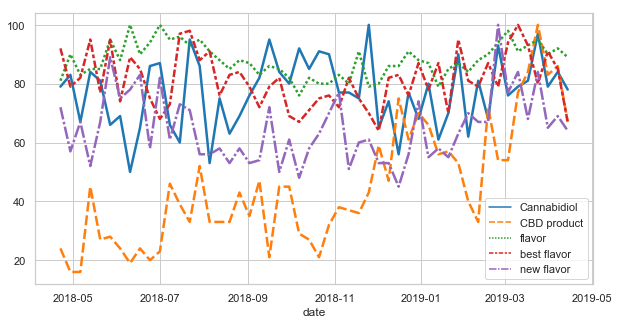

In [253]:
f, ax = plt.subplots(figsize=(10, 5), sharex=True)
sns.set(style="whitegrid")
sns.lineplot(data=ing_iot_df,palette="tab10", linewidth=2.5,ax=ax)

### Further work:
### Genral Trends
- Sources: **Google Trend**
- scraping the data of the last 1-year trend under the category 
    - Food & Drink
    - Health
    - Beauty & Fitness
    - Home
    - Travel
- In general, we would like to know the interests of the society. Could we find some inter relation between these topics? When people talk about food & drink what they want to know? do the preference of food and drink is under the influence of other aspects.
- the feautres are related to lifestyle that in intuition is closerly related to food. However, it's also possible that technology/news/ or others features could also make some impact in the people's choice of food 
- TimeLine: 1 year
- Region: USA